### Student Information
Name: 邱一恩

Student ID: 113033628

GitHub ID: En90

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

## Begin Assignment Here:

#### 1. Get the dataset

In [106]:
import pandas as pd
X = pd.read_csv("hf://datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")

In [107]:
X

,sentiment,comment
0,not nostalgia,He was a singer with a golden voice that I lov...
1,nostalgia,The mist beautiful voice ever I listened to hi...
2,nostalgia,I have most of Mr. Reeves songs. Always love ...
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...
4,nostalgia,listening to his songs reminds me of my mum wh...
...,...,...
1495,not nostalgia,"i don't know!..but the opening of the video,....."
1496,not nostalgia,it's sad this is such a beautiful song when yo...
1497,not nostalgia,"Dear Friend, I think age and time is not that ..."
1498,nostalgia,I was born in 1954 and started to be aware of ...


In [108]:
X['sentiment'].unique()

array(['not nostalgia', 'nostalgia'], dtype=object)

In [109]:
len(X)

1500

In [110]:
X.loc[1499, 'comment']

'This is the first CD I bought after my marriage ended in divorce after 28 years. I remember driving in my car turning this song up very loud had car the windows rolled down crying. 21 years later I still love this song'

In [111]:
def check_missing_values(row):
    """ functions that check and verifies if there are missing values in dataframe """
    counter = 0
    for element in row:
        if element == True:
            counter+=1
    return ("The amoung of missing records is: ", counter)

X.isnull().apply(lambda row: check_missing_values(row))

,sentiment,comment
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


In [112]:
sum(X.duplicated(subset=['comment']))

1

In [113]:
duplicates = X[X.duplicated(keep=False)]
print(duplicates)

        sentiment                                            comment
62  not nostalgia  never heard this song before... WOW What an am...
78  not nostalgia  never heard this song before... WOW What an am...


In [114]:
X.drop_duplicates(keep='first', inplace=True)
len(X)

1499

In [115]:
import matplotlib.pyplot as plt
%matplotlib inline

sentiment
nostalgia        750
not nostalgia    749
Name: count, dtype: int64


<Axes: title={'center': 'Sentiment distribution'}, xlabel='sentiment'>

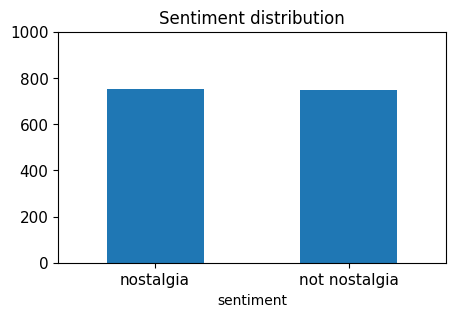

In [116]:
print(X['sentiment'].value_counts())

# plot barchart for X
X['sentiment'].value_counts().plot(kind = 'bar',
                                    title = 'Sentiment distribution',
                                    ylim = [0, 1000],        
                                    rot = 0, fontsize = 11, figsize = (5,3))

In [117]:
import nltk

In [118]:
def tokenize_text(text, remove_stopwords=False):
    """
    Tokenize text using the nltk library
    """
    tokens = []
    for d in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(d, language='english'):
            # filters here
            tokens.append(word)
    return tokens

X['unigrams'] = X['comment'].apply(lambda text: tokenize_text(text))
X

,sentiment,comment,unigrams
0,not nostalgia,He was a singer with a golden voice that I lov...,"[He, was, a, singer, with, a, golden, voice, t..."
1,nostalgia,The mist beautiful voice ever I listened to hi...,"[The, mist, beautiful, voice, ever, I, listene..."
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,"[I, have, most, of, Mr., Reeves, songs, ., Alw..."
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,"[30, day, leave, from, 1st, tour, in, Viet, Na..."
4,nostalgia,listening to his songs reminds me of my mum wh...,"[listening, to, his, songs, reminds, me, of, m..."
...,...,...,...
1495,not nostalgia,"i don't know!..but the opening of the video,.....","[i, do, n't, know, !, .., but, the, opening, o..."
1496,not nostalgia,it's sad this is such a beautiful song when yo...,"[it, 's, sad, this, is, such, a, beautiful, so..."
1497,not nostalgia,"Dear Friend, I think age and time is not that ...","[Dear, Friend, ,, I, think, age, and, time, is..."
1498,nostalgia,I was born in 1954 and started to be aware of ...,"[I, was, born, in, 1954, and, started, to, be,..."


In [119]:
list(X.loc[1497]['unigrams'])

['Dear',
 'Friend',
 ',',
 'I',
 'think',
 'age',
 'and',
 'time',
 'is',
 'not',
 'that',
 'important',
 'when',
 'it',
 'comes',
 'to',
 'music',
 '.',
 'I',
 'am',
 'glad',
 'you',
 'like',
 'this',
 'song',
 '.']

In [120]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X['comment']) #learn the vocabulary and return document-term matrix
X_counts.shape

(1499, 3730)

In [121]:
row = 0
print(X_counts[row])
X.loc[row, 'unigrams']

  (0, 1598)	1
  (0, 3570)	2
  (0, 2973)	1
  (0, 3650)	1
  (0, 1470)	1
  (0, 3534)	1
  (0, 3282)	1
  (0, 2028)	1
  (0, 3336)	1
  (0, 1606)	1
  (0, 233)	2
  (0, 3284)	3
  (0, 3328)	2
  (0, 1651)	2
  (0, 1512)	1
  (0, 1249)	1
  (0, 323)	1
  (0, 214)	1
  (0, 2341)	1
  (0, 15)	1
  (0, 1733)	1
  (0, 3304)	1
  (0, 907)	1
  (0, 258)	2
  (0, 3124)	1
  (0, 2328)	2
  (0, 245)	1
  (0, 3581)	1
  (0, 1591)	1
  (0, 2082)	1
  (0, 2974)	1
  (0, 573)	1
  (0, 593)	1
  (0, 3538)	1
  (0, 1347)	2
  (0, 1833)	1
  (0, 2671)	1
  (0, 3713)	2
  (0, 1272)	1
  (0, 2688)	1
  (0, 1125)	1
  (0, 2035)	1
  (0, 3278)	1
  (0, 2018)	1
  (0, 1964)	1


['He',
 'was',
 'a',
 'singer',
 'with',
 'a',
 'golden',
 'voice',
 'that',
 'I',
 'love',
 'to',
 'hear',
 'all',
 'the',
 'time',
 '.',
 'I',
 'was',
 'his',
 'great',
 'fan',
 'at',
 'the',
 'age',
 'of',
 '16years',
 'in',
 'those',
 'days',
 'and',
 'still',
 'now',
 '.',
 'Although',
 'we',
 'have',
 'many',
 'singers',
 'now',
 ',',
 'but',
 ',',
 'I',
 'can',
 'vouch',
 'for',
 'Jim',
 'Reeves',
 'all',
 'the',
 'time',
 '.',
 'You',
 'feel',
 'relaxed',
 ',',
 'emotional',
 'and',
 'loving',
 '.',
 'Thank',
 'you',
 'Lord',
 'for',
 'his',
 'life',
 '.']

In [122]:
count_vect.get_feature_names_out()[3284]

'the'

In [123]:
vocab = count_vect.vocabulary_
index = vocab.get('the')
print(index)

3284


In [124]:
import numpy as np
word_counts = np.asarray(X_counts.sum(axis=0)).flatten()
print(word_counts.size)

3730


In [125]:
word_count_dict = dict(zip(count_vect.get_feature_names_out(), word_counts))
# for word, count in word_count_dict.items():
    # print(f"'{word}': {count}")

In [126]:
print("most usage word: ")
print(count_vect.get_feature_names_out()[np.argmax(word_counts)])
print("most usage times: ")
print(np.max(word_counts))

most usage word: 
the
most usage times: 
1351


In [127]:
word_count_dict.get('the') #sum of word: the

1351

In [128]:
import plotly.express as px
import pandas as pd
import math

word_counts_log = [math.log(i) for i in word_counts]

terms = count_vect.get_feature_names_out()
temp_df = pd.DataFrame({
    'term': terms,
    'frequency': word_counts_log
})

filtered_df = temp_df[temp_df['frequency'] > 3]
sorted_df = filtered_df.sort_values(by='frequency', ascending=False)

fig = px.histogram(sorted_df, x='term', y='frequency')

fig.update_layout(
    xaxis=dict(
        rangeslider=dict(visible=True),  # Adds the range slider
        tickmode='linear',               # Ensures all ticks are spaced evenly
    )
)

fig.show()

In [129]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
labels = X['sentiment'].unique()  # Get unique category labels 四種不同的 category
labels_dfs = {}  # Dictionary to store DataFrames for each category

for label in labels:
    # Filter the original DataFrame by category
    labels_dfs[label] = X[X['sentiment'] == label].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['comment'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for label in labels:
    term_document_dfs[label] = create_term_document_df(labels_dfs[label])

In [130]:
X_counts

<1499x3730 sparse matrix of type '<class 'numpy.int64'>'
	with 31249 stored elements in Compressed Sparse Row format>

In [131]:
label_index = 1 # 0, 1
print(f"Filtered Term-Document Frequency DataFrame for Label {labels[label_index]}:")
term_document_dfs[labels[label_index]]
# 某個 category 中每個 doc 中，各個單字的數量
# doc數量 * 這個category中所有用到的單字種類的數量

Filtered Term-Document Frequency DataFrame for Label nostalgia:


,07,10,11,11th,12,13,14,15,16,17,...,young,younger,youngster,your,yours,youth,youthful,youtube,yrs,yup
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
747,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
748,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


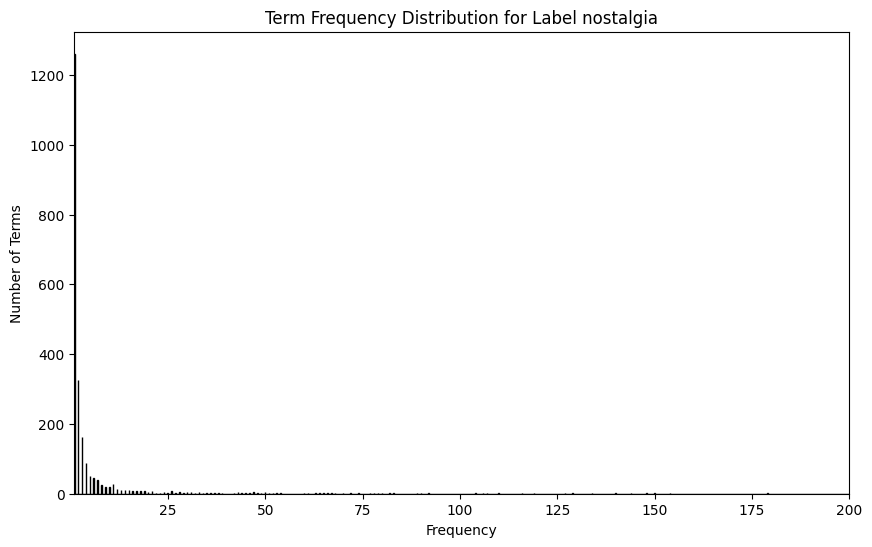

In [132]:
category_number=0 #You can change it from 0 to 3
word_counts = term_document_dfs[labels[label_index]].sum(axis=0).to_numpy()
# 這個 category 下 所有 docs 中各個 word出現的次數加總

# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
# 每個 bin 中有很多個單字
plt.title(f'Term Frequency Distribution for Label {labels[label_index]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms') # 這個 bin 中含有幾個 word
plt.xlim(1, 200) # 使用次數最少的前 1~200 個 bin
plt.show()

# 將 word 根據使用頻率分成多個 bin

In [133]:
temp_pd_out_bottom = pd.DataFrame()
temp_pd_out_top = pd.DataFrame()

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, category_name, temp_pd_bottom, temp_pd_top, top_percent=0.02, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    
    print(f'Bottom percentage: {sorted_words.head(bottom_n)}') # print which words correspond to the bottom percentage we filterd
    print(f'Top percentage: {sorted_words.tail(top_n)}') # print which words correspond to the top percentage we filterd

    if (temp_pd_top.empty):
        temp_pd_top = pd.DataFrame(sorted_words.tail(20).index.array, columns=[category_name])
    else:
        right = pd.DataFrame(sorted_words.tail(20).index.array, columns=[category_name])
        temp_pd_top = pd.merge(temp_pd_top, right, left_index=True, right_index=True)

    if (temp_pd_bottom.empty):
        temp_pd_bottom = pd.DataFrame(sorted_words.head(20).index.array, columns=[category_name])
    else:
        right = pd.DataFrame(sorted_words.head(20).index.array, columns=[category_name])
        temp_pd_bottom = pd.merge(temp_pd_bottom, right, left_index=True, right_index=True)
    
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove), temp_pd_bottom, temp_pd_top
    

# Apply the filtering function to each category
filtered_term_document_dfs = {}

for label in labels:
    print(f'For label {label} we filter the following words:')
    filtered_term_document_dfs[label], temp_pd_out_bottom, temp_pd_out_top = filter_top_bottom_words_by_sum(term_document_dfs[label], label, temp_pd_out_bottom, temp_pd_out_top)

# Example: Display the filtered DataFrame for one of the categories
label_index = 0 # 0, 1
print(f"Filtered Term-Document Frequency DataFrame for Label {labels[label_index]}:")
filtered_term_document_dfs[labels[label_index]]

For label not nostalgia we filter the following words:
Bottom percentage: 00               1
montgomery       1
money            1
monday           1
moments          1
mocking          1
mock             1
mitch            1
misunderstood    1
minute           1
minds            1
miller           1
monumental       1
millennium       1
miles            1
microphone       1
miami            1
meta             1
mess             1
merle            1
mendes           1
mended           1
melting          1
melt             1
melodica         1
milestone        1
dtype: int64
Top percentage: never         55
now           55
know          55
no            58
good          59
always        59
are           60
at            60
his           63
from          65
when          73
they          74
will          75
she           76
time          79
her           79
songs         82
beautiful     82
as            82
just          84
voice         88
me            88
can           89
be          

,000,045,10,100,10m,11,12,14,15,150,...,youngest,youngsters,your,yourself,youth,youtube,yrs,yuo,zealand,zulus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
747,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [134]:
temp_pd_out_bottom

,not nostalgia,nostalgia
0,00,yup
1,montgomery,gospel
2,money,rose
3,monday,round
4,moments,rousing
5,mocking,goodness
6,mock,routine
7,mitch,row
8,misunderstood,ronnie
9,minute,rpg


In [135]:
temp_pd_out_top.iloc[::-1].reset_index(drop=True)

,not nostalgia,nostalgia
0,the,the
1,this,my
2,and,this
3,to,to
4,of,and
5,song,song
6,it,was
7,is,of
8,in,in
9,you,it


In [136]:
term_document_dfs = filtered_term_document_dfs

In [137]:
from PAMI.extras.DF2DB import DenseFormatDF as db

# Loop through the dictionary of term-document DataFrames
for label in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    label_safe = label.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = db.DenseFormatDF(term_document_dfs[label])
    obj.convert2TransactionalDatabase(f'td_freq_db_{label_safe}.csv', '>=', 1)
    #使用頻率大於等於1的(有使用的)都會被加入 transaction 中

Database size (total no of transactions) : 747
Number of items : 2228
Minimum Transaction Size : 1
Average Transaction Size : 12.349397590361447
Maximum Transaction Size : 49
Standard Deviation Transaction Size : 9.503314945412171
Variance in Transaction Sizes : 90.43405794760812
Sparsity : 0.9944571824100712


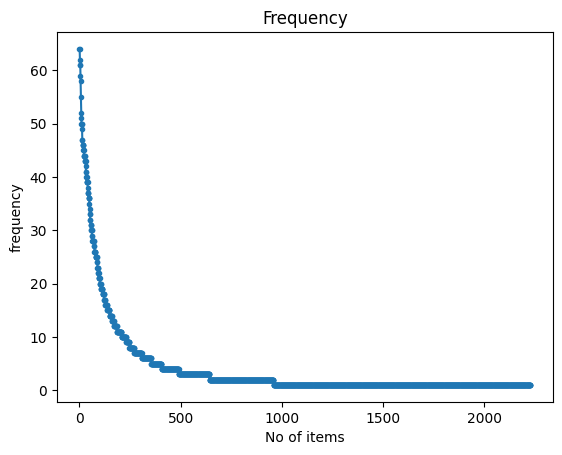

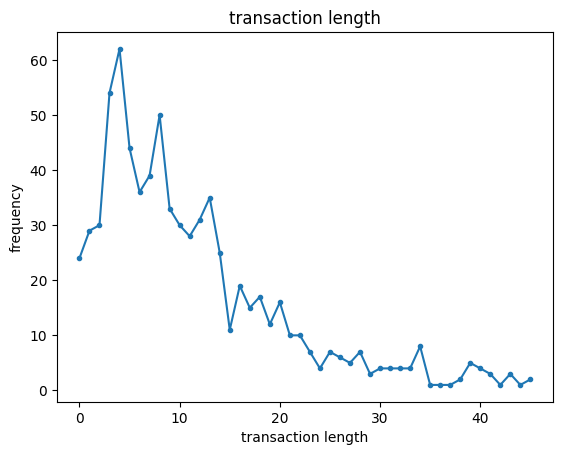

In [138]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 749
Number of items : 2524
Minimum Transaction Size : 1
Average Transaction Size : 11.847797062750335
Maximum Transaction Size : 54
Standard Deviation Transaction Size : 7.349981505035951
Variance in Transaction Sizes : 54.09445035448334
Sparsity : 0.9953059441114301


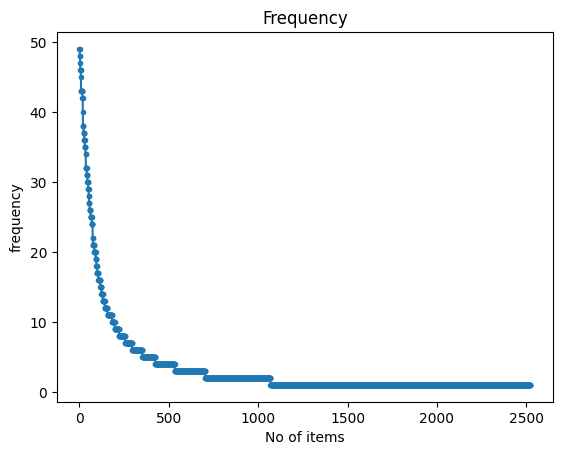

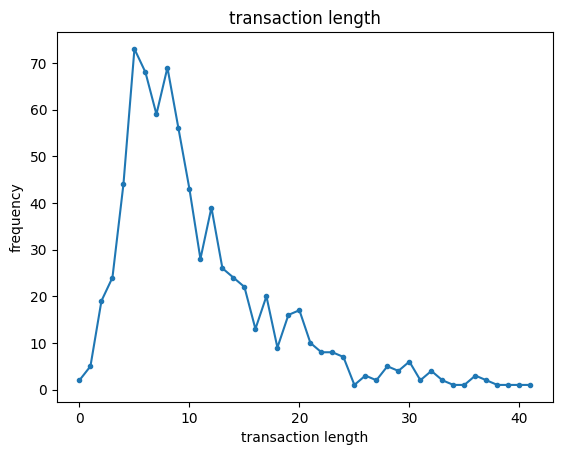

In [139]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_not nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [140]:
from PAMI.frequentPattern.basic import FPGrowth as alg

minSups =[6, 9, 12]
labels = ["nostalgia", "not nostalgia"]
FPGrowth_dfs = list(dict())

for label in labels:
    d = {}
    for minSup in minSups:
        f'td_freq_db_{label_safe}.csv'
        obj = alg.FPGrowth(iFile=f'td_freq_db_{label}.csv', minSup=minSup)
        obj.mine()
        frequentPatternsDF= obj.getPatternsAsDataFrame()
        d[minSup] = frequentPatternsDF
        print('Total No of patterns: ' + str(len(frequentPatternsDF))) #print the total number of patterns
        print('Runtime: ' + str(obj.getRuntime())) #measure the runtime
        obj.save(f'freq_patterns_{label}_minSup{minSup}.txt') #save the patterns
    FPGrowth_dfs.append(d)

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 789
Runtime: 0.023181676864624023
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 323
Runtime: 0.01488351821899414
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 204
Runtime: 0.013070344924926758
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 433
Runtime: 0.01404261589050293
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 234
Runtime: 0.011544227600097656
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 161
Runtime: 0.008521080017089844


In [141]:
# FAE Top-K, ref: https://pami-1.readthedocs.io/en/latest/frequentPatternTopkFAE.html
from PAMI.frequentPattern.topk import FAE as alg

ks = [100, 200, 300]
labels = ["nostalgia", "not nostalgia"]
FAE_TopK_dfs = list(dict())

for label in labels:
    d = {}
    for k in ks:
        obj = alg.FAE(iFile=f'td_freq_db_{label}.csv', k=k)
        obj.mine()
        frequentPatternsDF= obj.getPatternsAsDataFrame()
        d[k] = frequentPatternsDF
        print('Total No of patterns: ' + str(len(frequentPatternsDF))) #print the total number of patterns
        print('Runtime: ' + str(obj.getRuntime())) #measure the runtime
        obj.save(f'freq_patterns_{label}_k{k}.txt') #save the patterns
    FAE_TopK_dfs.append(d)

 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 100
Runtime: 0.009233474731445312
 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 200
Runtime: 0.015550851821899414
 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 300
Runtime: 0.029322385787963867
 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 100
Runtime: 0.007554292678833008
 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 200
Runtime: 0.01303243637084961
 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 300
Runtime: 0.020061492919921875


In [142]:
# MaxFPGrowth, ref: https://pami-1.readthedocs.io/en/latest/frequentPatternMaximalmaxFPGrowth.html
from PAMI.frequentPattern.maximal import MaxFPGrowth as alg

max_minSups =[6, 9, 12]
labels = ["nostalgia", "not nostalgia"]
MaxFPGrowth_dfs = list(dict())

for label in labels:
    d = {}
    for minSup in max_minSups:
        obj = alg.MaxFPGrowth(iFile=f'td_freq_db_{label}.csv', minSup=minSup)
        obj.mine()
        frequentPatternsDF= obj.getPatternsAsDataFrame()
        d[minSup] = frequentPatternsDF
        print('Total No of patterns: ' + str(len(frequentPatternsDF))) #print the total number of patterns
        print('Runtime: ' + str(obj.getRuntime())) #measure the runtime
        obj.save(f'freq_patterns_{label}_Max_minSup{minSup}.txt') #save the patterns
    MaxFPGrowth_dfs.append(d)

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 632
Runtime: 0.02683401107788086
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 263
Runtime: 0.015070676803588867
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 174
Runtime: 0.012752056121826172
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 360
Runtime: 0.016430377960205078
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 214
Runtime: 0.012053251266479492
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 153
Runtime: 0.009524822235107422


In [143]:
# Identify patterns that appear in more than one label (FPGrowth)

# Count how many times each pattern appears across all dataframes
pattern_counts = {}
dfs = FPGrowth_dfs
key = 9 # minSup

for parameter_dict in dfs:
    df = parameter_dict.get(key)
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all labels
total_patterns_count = sum(len(parameter_dict.get(key)) for parameter_dict in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for parameter_dict in dfs:
    df = parameter_dict.get(key)
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df_FPGrowth = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df_FPGrowth = final_pattern_df_FPGrowth.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df_FPGrowth)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

        Patterns  Support
182         have       64
183         just       64
180       always       62
168           he       50
165          dad       50
..           ...      ...
185    favorites        9
181  always have        9
179    many have        9
177     had just        9
0         player        9

[281 rows x 2 columns]
Number of patterns discarded: 276


In [144]:
# Identify patterns that appear in more than one label (FPGrowth)

# Count how many times each pattern appears across all dataframes
pattern_counts = {}
dfs = MaxFPGrowth_dfs
key = 9 # max_minSup

for parameter_dict in dfs:
    df = parameter_dict.get(key)
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all labels
total_patterns_count = sum(len(parameter_dict.get(key)) for parameter_dict in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for parameter_dict in dfs:
    df = parameter_dict.get(key)
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df_MaxFPGrowth = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df_MaxFPGrowth = final_pattern_df_MaxFPGrowth.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df_MaxFPGrowth)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

         Patterns  Support
278          how        46
276           we        43
272        still        42
271          out        42
129         what        41
..            ...      ...
164          end         9
162  have always         9
161    have many         9
159     just had         9
0          karen         9

[279 rows x 2 columns]
Number of patterns discarded: 198


In [145]:
# Identify patterns that appear in more than one label (FPGrowth)

# Count how many times each pattern appears across all dataframes
pattern_counts = {}
dfs = FAE_TopK_dfs
key = 200 # k

for parameter_dict in dfs:
    df = parameter_dict.get(key)
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all labels
total_patterns_count = sum(len(parameter_dict.get(key)) for parameter_dict in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for parameter_dict in dfs:
    df = parameter_dict.get(key)
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df_FAE_TopK = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df_FAE_TopK = final_pattern_df_FAE_TopK.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df_FAE_TopK)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

      Patterns  Support
0         have       64
1         just       64
2       always       62
3         like       50
4          dad       50
..         ...      ...
185     friend       10
184      thing       10
183    believe       10
182      movie       10
191  much very       10

[192 rows x 2 columns]
Number of patterns discarded: 208


In [146]:
final_pattern_df = final_pattern_df_MaxFPGrowth

In [147]:
X

,sentiment,comment,unigrams
0,not nostalgia,He was a singer with a golden voice that I lov...,"[He, was, a, singer, with, a, golden, voice, t..."
1,nostalgia,The mist beautiful voice ever I listened to hi...,"[The, mist, beautiful, voice, ever, I, listene..."
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,"[I, have, most, of, Mr., Reeves, songs, ., Alw..."
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,"[30, day, leave, from, 1st, tour, in, Viet, Na..."
4,nostalgia,listening to his songs reminds me of my mum wh...,"[listening, to, his, songs, reminds, me, of, m..."
...,...,...,...
1495,not nostalgia,"i don't know!..but the opening of the video,.....","[i, do, n't, know, !, .., but, the, opening, o..."
1496,not nostalgia,it's sad this is such a beautiful song when yo...,"[it, 's, sad, this, is, such, a, beautiful, so..."
1497,not nostalgia,"Dear Friend, I think age and time is not that ...","[Dear, Friend, ,, I, think, age, and, time, is..."
1498,nostalgia,I was born in 1954 and started to be aware of ...,"[I, was, born, in, 1954, and, started, to, be,..."


In [148]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'comment' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['comment'])  # df['comment'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_text'] = X['comment'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

,00,000,045,07,10,100,10m,11,11th,12,...,sung,handsome,perfect,ll,almost,end,have always,have many,just had,karen
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [149]:
X # what the diff between unigrams and tokennized_text

,sentiment,comment,unigrams,tokenized_text
0,not nostalgia,He was a singer with a golden voice that I lov...,"[He, was, a, singer, with, a, golden, voice, t...","{now,, age, voice, great, for, golden, of, lif..."
1,nostalgia,The mist beautiful voice ever I listened to hi...,"[The, mist, beautiful, voice, ever, I, listene...","{voice, singing, of, when, forgotten, The, his..."
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,"[I, have, most, of, Mr., Reeves, songs, ., Alw...","{sounds, grew, voice,, leave, age, smooth, had..."
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,"[30, day, leave, from, 1st, tour, in, Viet, Na...","{you, Lou., 1st, greatest, leave, pray, Viet, ..."
4,nostalgia,listening to his songs reminds me of my mum wh...,"[listening, to, his, songs, reminds, me, of, m...","{played, to, his, him, everyday, reminds, who,..."
...,...,...,...,...
1495,not nostalgia,"i don't know!..but the opening of the video,.....","[i, do, n't, know, !, .., but, the, opening, o...","{i, painter, video,..seeing, of, that, going, ..."
1496,not nostalgia,it's sad this is such a beautiful song when yo...,"[it, 's, sad, this, is, such, a, beautiful, so...","{is, when, how, tell, really, this, it's, your..."
1497,not nostalgia,"Dear Friend, I think age and time is not that ...","[Dear, Friend, ,, I, think, age, and, time, is...","{age, Friend,, comes, is, Dear, when, song., t..."
1498,nostalgia,I was born in 1954 and started to be aware of ...,"[I, was, born, in, 1954, and, started, to, be,...","{commented,, 1954, age, voice, of, presence., ..."


In [150]:
len(X.loc[0, 'unigrams'])

68

In [151]:
len(X.loc[0, 'tokenized_text'])

49

In [152]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
# 先嘗試應用在沒有經過增強的資料上(沒有 pattern)
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

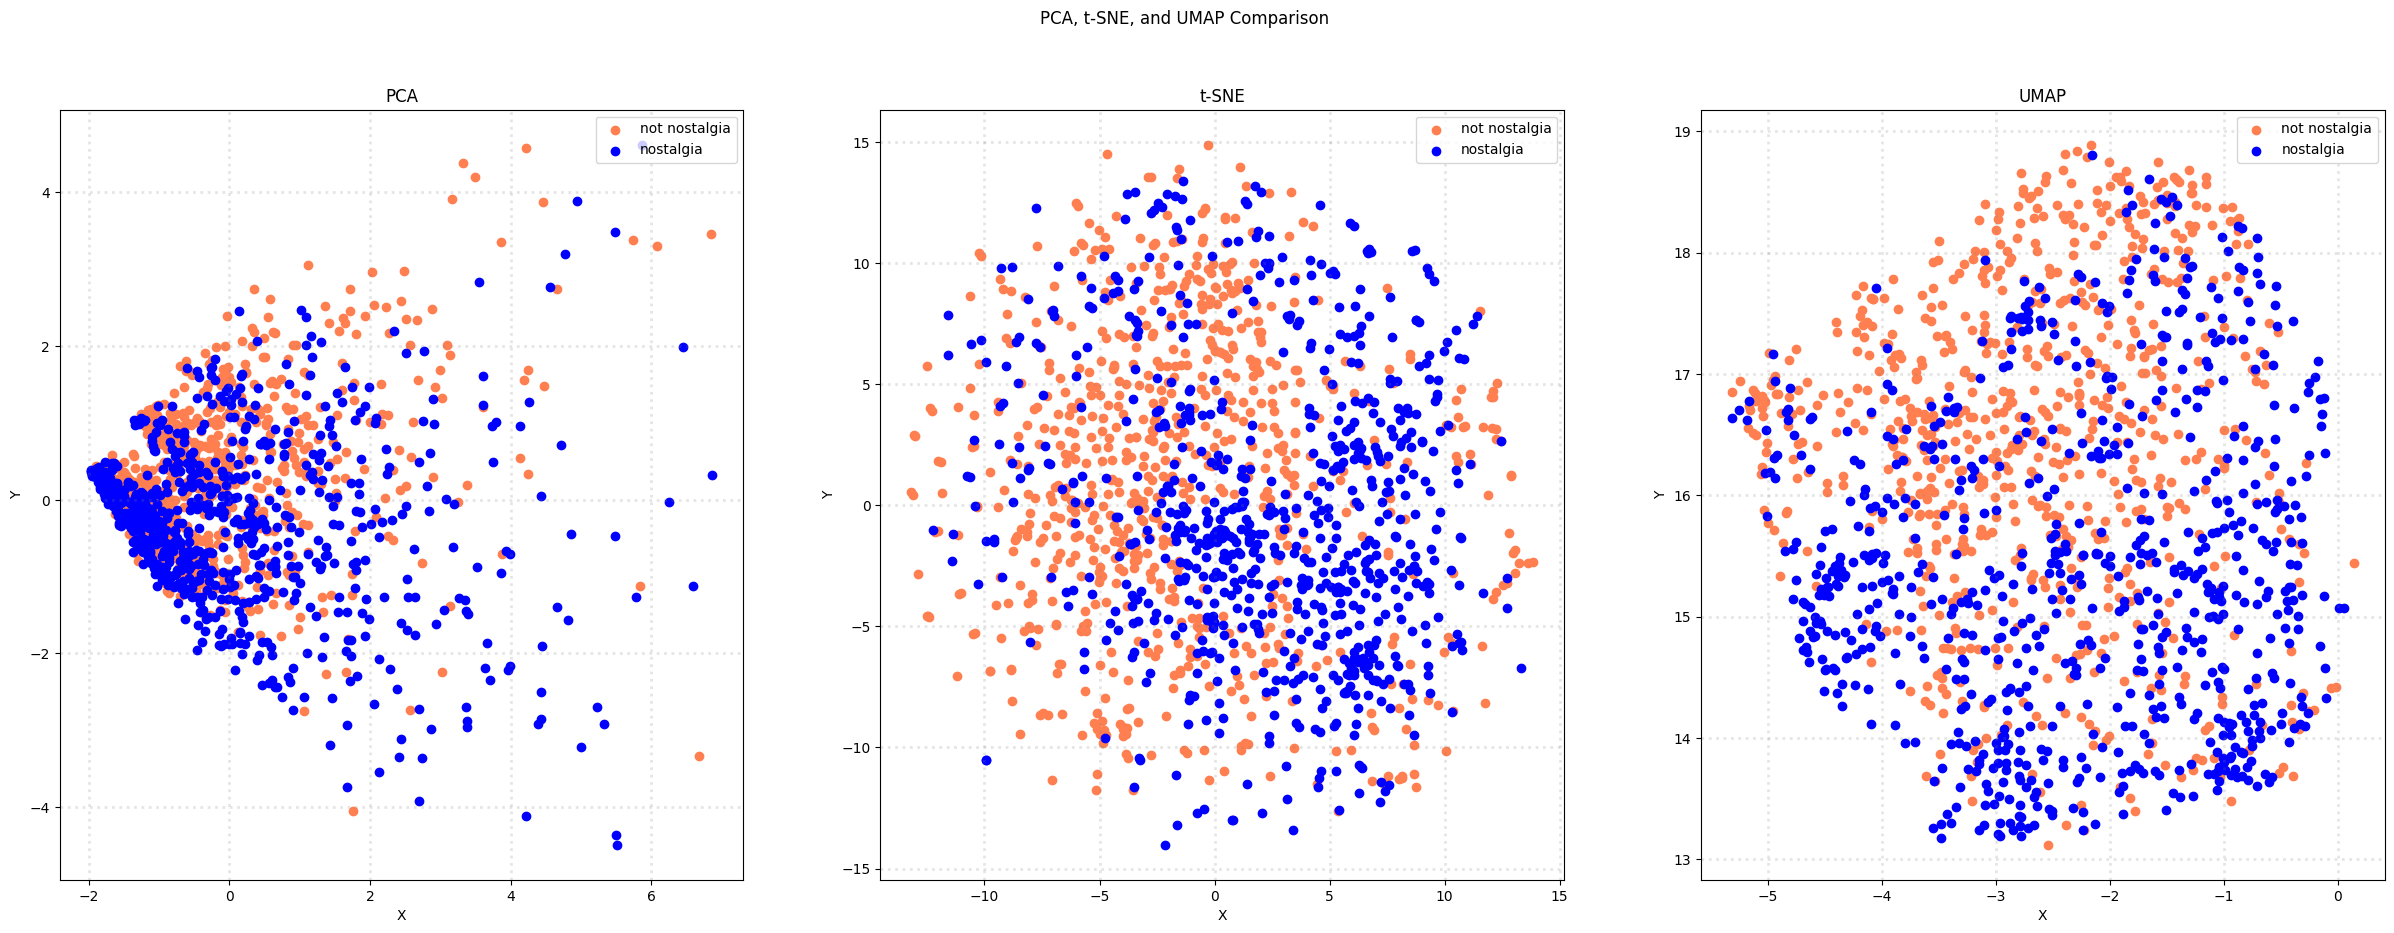

In [153]:
# Plot the results in subplots
col = ['coral', 'blue']
sentiments = X['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, lable in zip(col, sentiments):
        xs = X_reduced[X['sentiment'] == lable].T[0]
        ys = X_reduced[X['sentiment'] == lable].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=lable)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

In [154]:
#This might take a couple of minutes to execute
#Applying dimensionality reduction with both the document-term frequency data and the pattern derived data
# Apply PCA, t-SNE, and UMAP to the data
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

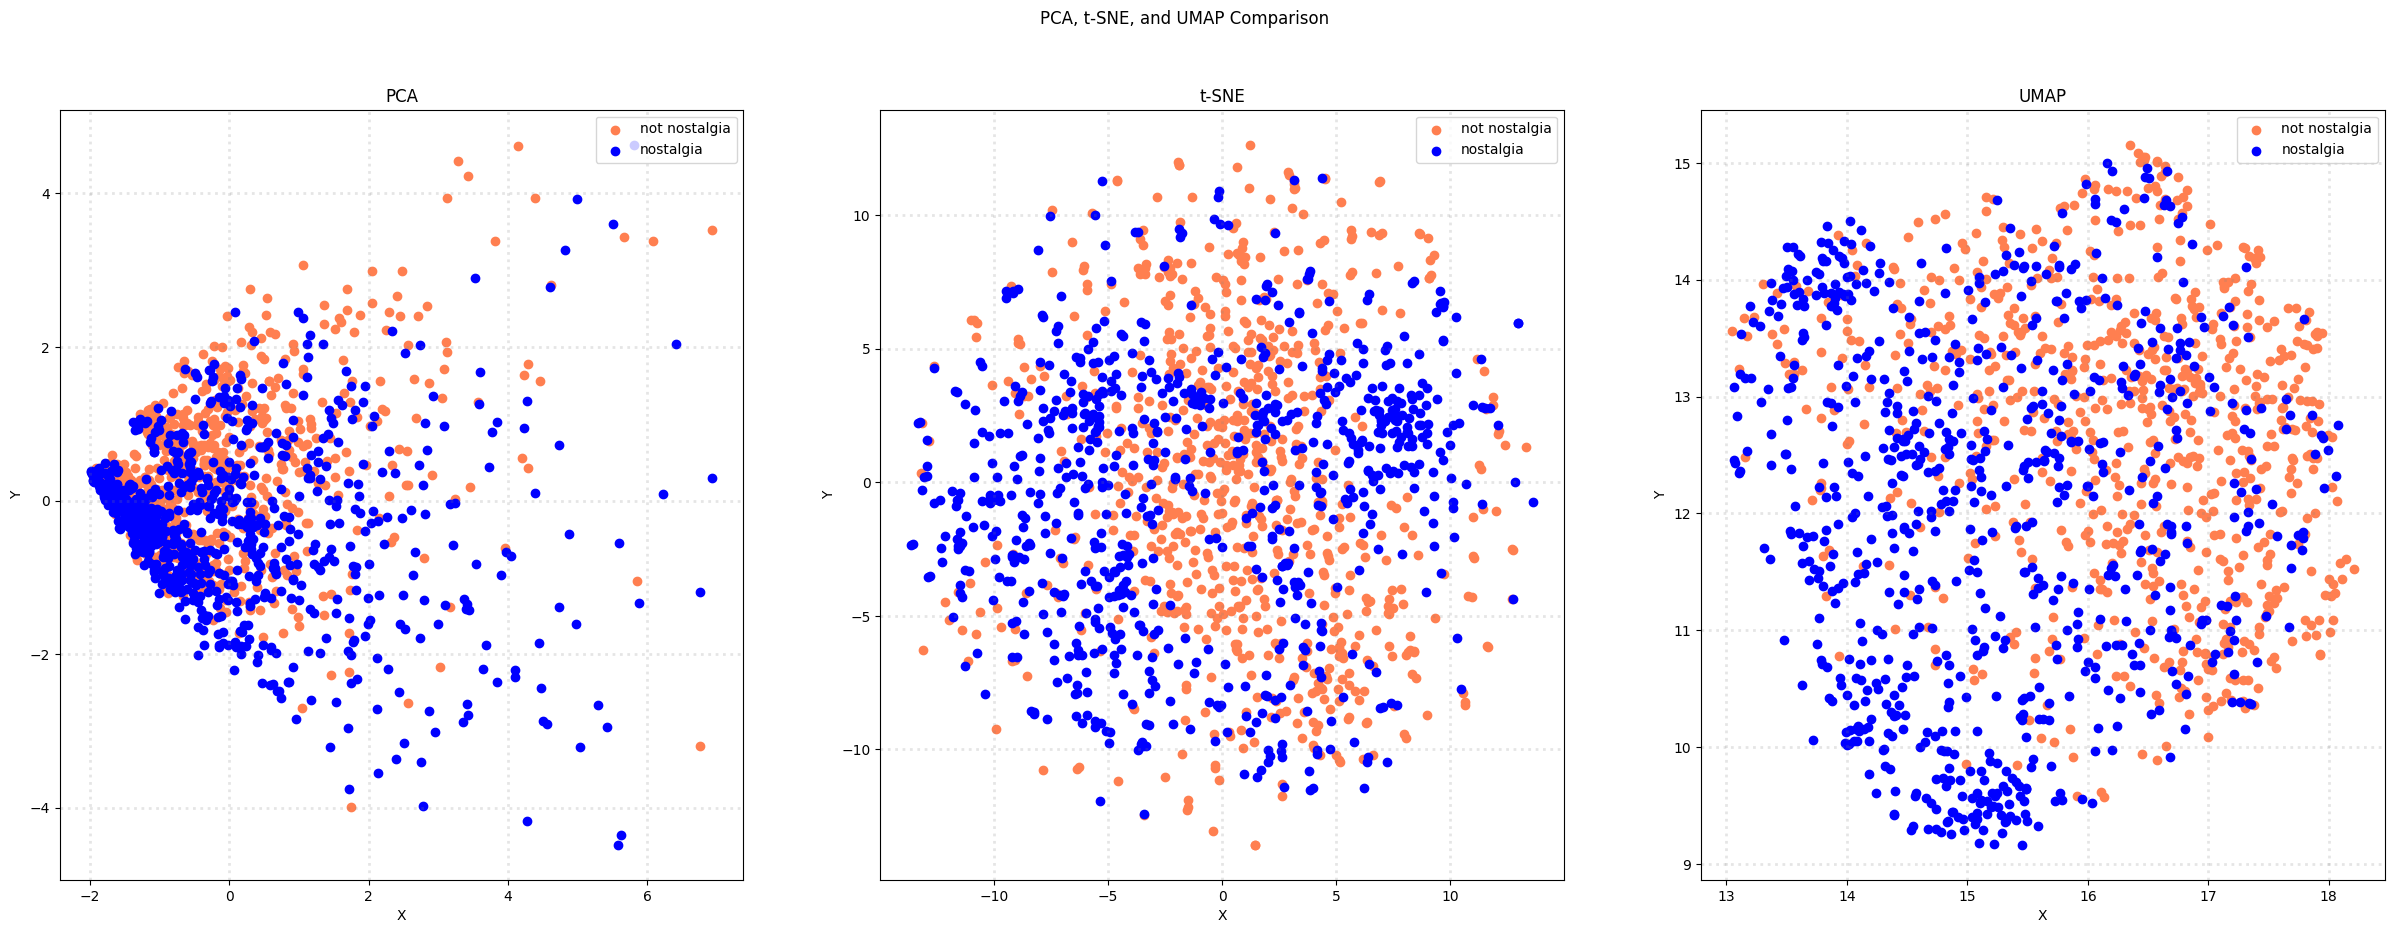

In [155]:
# Plot the results in subplots
col = ['coral', 'blue']
sentiments = X['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, lable in zip(col, sentiments):
        xs = X_reduced[X['sentiment'] == lable].T[0]
        ys = X_reduced[X['sentiment'] == lable].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=lable)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

In [156]:
# Answer here
X_pca_aug_3d = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne_aug_3d = TSNE(n_components=3).fit_transform(augmented_df.values)
X_umap_aug_3d = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

In [157]:
def cal_df (X_reduced):
    df = pd.DataFrame()
    for c, label in zip(col, sentiments):
        xs = X_reduced[X['sentiment'] == label].T[0]
        ys = X_reduced[X['sentiment'] == label].T[1]
        zs = X_reduced[X['sentiment'] == label].T[2]
        d = {'X': xs, 'Y': ys, 'Z': zs}
        temp_df = pd.DataFrame(data = d)
        temp_df['name'] = label
        if (df.empty):
            df = temp_df
        else:
            df = pd.concat([df, temp_df])
    return df

In [158]:
df_plot = cal_df(X_pca_aug_3d)
fig = px.scatter_3d(df_plot, x='X', y='Y', z='Z', color='name')
fig.show()

In [159]:
df_plot = cal_df(X_tsne_aug_3d)
fig = px.scatter_3d(df_plot, x='X', y='Y', z='Z', color='name')
fig.show()

In [160]:
df_plot = cal_df(X_umap_aug_3d)
fig = px.scatter_3d(df_plot, x='X', y='Y', z='Z', color='name')
fig.show()

In [161]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X['sentiment'])
X['bin_sentiment'] = mlb.transform(X['sentiment']).tolist()
X

,sentiment,comment,unigrams,tokenized_text,bin_sentiment
0,not nostalgia,He was a singer with a golden voice that I lov...,"[He, was, a, singer, with, a, golden, voice, t...","{now,, age, voice, great, for, golden, of, lif...",[1]
1,nostalgia,The mist beautiful voice ever I listened to hi...,"[The, mist, beautiful, voice, ever, I, listene...","{voice, singing, of, when, forgotten, The, his...",[0]
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,"[I, have, most, of, Mr., Reeves, songs, ., Alw...","{sounds, grew, voice,, leave, age, smooth, had...",[0]
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,"[30, day, leave, from, 1st, tour, in, Viet, Na...","{you, Lou., 1st, greatest, leave, pray, Viet, ...",[1]
4,nostalgia,listening to his songs reminds me of my mum wh...,"[listening, to, his, songs, reminds, me, of, m...","{played, to, his, him, everyday, reminds, who,...",[0]
...,...,...,...,...,...
1495,not nostalgia,"i don't know!..but the opening of the video,.....","[i, do, n't, know, !, .., but, the, opening, o...","{i, painter, video,..seeing, of, that, going, ...",[1]
1496,not nostalgia,it's sad this is such a beautiful song when yo...,"[it, 's, sad, this, is, such, a, beautiful, so...","{is, when, how, tell, really, this, it's, your...",[1]
1497,not nostalgia,"Dear Friend, I think age and time is not that ...","[Dear, Friend, ,, I, think, age, and, time, is...","{age, Friend,, comes, is, Dear, when, song., t...",[1]
1498,nostalgia,I was born in 1954 and started to be aware of ...,"[I, was, born, in, 1954, and, started, to, be,...","{commented,, 1954, age, voice, of, presence., ...",[0]


In [162]:
X_sample = X.sample(n=3)
X_sample

document_to_transform_1 = []
random_record_1 = X_sample.iloc[0, 1]
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X_sample.iloc[1, 1]
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X_sample.iloc[2, 1]
document_to_transform_3.append(random_record_3)

print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['Top of the best...brings back very very fond old memories of those good golden days.']
['these songs are classic, appeals to all generations, just found out that some were sung by modern artists today']
["Hello Romance and Reflection Just heard this on Golden Years Radio . net and all the 60's music that gets played takes me back to the good old days when I had a rock band called The Presidents. Our recording for Decca in 1965 was lost for 53 years and just released in June 2018 and Golden Years has included it in the play list.  Got the old band back together and made a video so it's me 78 miming to me singing 25 - great fun and who knows we might trend : -)    "]


In [163]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [164]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.221648
Cosine Similarity using count bw 2 and 3: 0.104957


C:\Users\USER\AppData\Local\Temp\ipykernel_33336\2841806267.py:9: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\USER\AppData\Local\Temp\ipykernel_33336\2841806267.py:10: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\USER\AppData\Local\Temp\ipykernel_33336\2841806267.py:11: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



In [165]:
X

,sentiment,comment,unigrams,tokenized_text,bin_sentiment
0,not nostalgia,He was a singer with a golden voice that I lov...,"[He, was, a, singer, with, a, golden, voice, t...","{now,, age, voice, great, for, golden, of, lif...",[1]
1,nostalgia,The mist beautiful voice ever I listened to hi...,"[The, mist, beautiful, voice, ever, I, listene...","{voice, singing, of, when, forgotten, The, his...",[0]
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,"[I, have, most, of, Mr., Reeves, songs, ., Alw...","{sounds, grew, voice,, leave, age, smooth, had...",[0]
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,"[30, day, leave, from, 1st, tour, in, Viet, Na...","{you, Lou., 1st, greatest, leave, pray, Viet, ...",[1]
4,nostalgia,listening to his songs reminds me of my mum wh...,"[listening, to, his, songs, reminds, me, of, m...","{played, to, his, him, everyday, reminds, who,...",[0]
...,...,...,...,...,...
1495,not nostalgia,"i don't know!..but the opening of the video,.....","[i, do, n't, know, !, .., but, the, opening, o...","{i, painter, video,..seeing, of, that, going, ...",[1]
1496,not nostalgia,it's sad this is such a beautiful song when yo...,"[it, 's, sad, this, is, such, a, beautiful, so...","{is, when, how, tell, really, this, it's, your...",[1]
1497,not nostalgia,"Dear Friend, I think age and time is not that ...","[Dear, Friend, ,, I, think, age, and, time, is...","{age, Friend,, comes, is, Dear, when, song., t...",[1]
1498,nostalgia,I was born in 1954 and started to be aware of ...,"[I, was, born, in, 1954, and, started, to, be,...","{commented,, 1954, age, voice, of, presence., ...",[0]


In [166]:
X['sentiment_num'] = X['bin_sentiment'].apply(lambda x: x[0])
X

,sentiment,comment,unigrams,tokenized_text,bin_sentiment,sentiment_num
0,not nostalgia,He was a singer with a golden voice that I lov...,"[He, was, a, singer, with, a, golden, voice, t...","{now,, age, voice, great, for, golden, of, lif...",[1],1
1,nostalgia,The mist beautiful voice ever I listened to hi...,"[The, mist, beautiful, voice, ever, I, listene...","{voice, singing, of, when, forgotten, The, his...",[0],0
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,"[I, have, most, of, Mr., Reeves, songs, ., Alw...","{sounds, grew, voice,, leave, age, smooth, had...",[0],0
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,"[30, day, leave, from, 1st, tour, in, Viet, Na...","{you, Lou., 1st, greatest, leave, pray, Viet, ...",[1],1
4,nostalgia,listening to his songs reminds me of my mum wh...,"[listening, to, his, songs, reminds, me, of, m...","{played, to, his, him, everyday, reminds, who,...",[0],0
...,...,...,...,...,...,...
1495,not nostalgia,"i don't know!..but the opening of the video,.....","[i, do, n't, know, !, .., but, the, opening, o...","{i, painter, video,..seeing, of, that, going, ...",[1],1
1496,not nostalgia,it's sad this is such a beautiful song when yo...,"[it, 's, sad, this, is, such, a, beautiful, so...","{is, when, how, tell, really, this, it's, your...",[1],1
1497,not nostalgia,"Dear Friend, I think age and time is not that ...","[Dear, Friend, ,, I, think, age, and, time, is...","{age, Friend,, comes, is, Dear, when, song., t...",[1],1
1498,nostalgia,I was born in 1954 and started to be aware of ...,"[I, was, born, in, 1954, and, started, to, be,...","{commented,, 1954, age, voice, of, presence., ...",[0],0


In [167]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
sentiment_mapping = dict(X[['sentiment_num', 'sentiment']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [sentiment_mapping[label] for label in sorted(sentiment_mapping.keys())]
print(target_names)

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['sentiment_num'], test_size=0.3, random_state=42)

['nostalgia', 'not nostalgia']


In [168]:
X_train

,00,000,045,07,10,100,10m,11,11th,12,...,yours,yourself,youth,youthful,youtube,yrs,yuo,yup,zealand,zulus
486,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
528,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
890,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1295,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1460,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [169]:
y_train

486     1
528     1
200     1
890     1
845     0
       ..
1131    0
1295    1
861     1
1460    1
1127    0
Name: sentiment_num, Length: 1049, dtype: int64

In [170]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8688888888888889

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.8222    0.9528    0.8827       233
not nostalgia     0.9389    0.7788    0.8514       217

     accuracy                         0.8689       450
    macro avg     0.8806    0.8658    0.8670       450
 weighted avg     0.8785    0.8689    0.8676       450



In [171]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
sentiment_mapping = dict(X[['sentiment_num', 'sentiment']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [sentiment_mapping[label] for label in sorted(sentiment_mapping.keys())]
print(target_names)

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, X['sentiment_num'], test_size=0.3, random_state=42)

['nostalgia', 'not nostalgia']


In [172]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8622222222222222

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.8132    0.9528    0.8775       233
not nostalgia     0.9379    0.7650    0.8426       217

     accuracy                         0.8622       450
    macro avg     0.8755    0.8589    0.8601       450
 weighted avg     0.8733    0.8622    0.8607       450



In [173]:
X_visual = pd.read_csv("hf://datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")

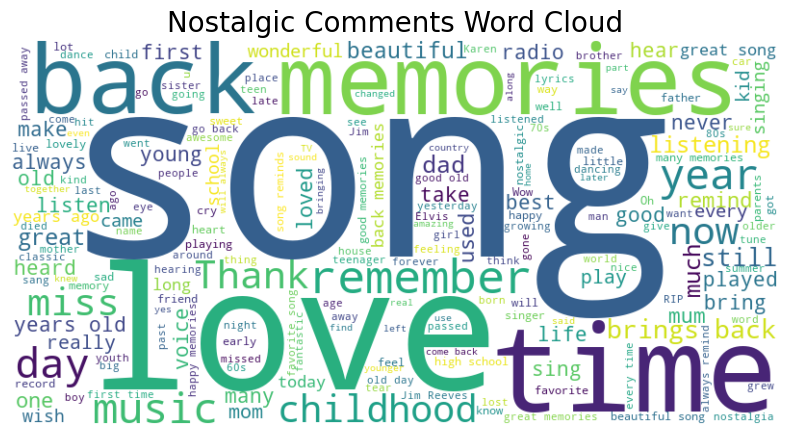

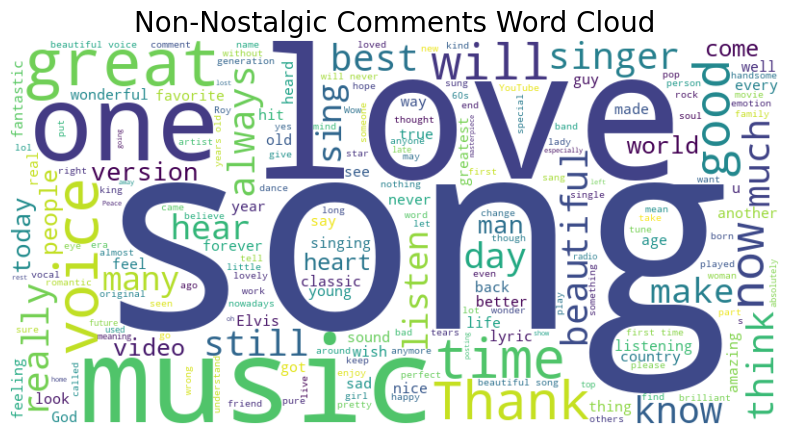

In [174]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

nostalgic_comments = ' '.join(X_visual[X_visual['sentiment'] == 'nostalgia']['comment'])
non_nostalgic_comments = ' '.join(X_visual[X_visual['sentiment'] == 'not nostalgia']['comment'])

generate_word_cloud(nostalgic_comments, "Nostalgic Comments Word Cloud")
generate_word_cloud(non_nostalgic_comments, "Non-Nostalgic Comments Word Cloud")

In [175]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import plotly.express as px

# Step 1: Tokenize and create a word frequency table using CountVectorizer
vectorizer = CountVectorizer()
X_counts = vectorizer.fit_transform(X_visual['comment'])
word_freq_df = pd.DataFrame(X_counts.toarray(), columns=vectorizer.get_feature_names_out())
word_freq_df['sentiment'] = X_visual['sentiment']
nostalgic_word_freq = word_freq_df[word_freq_df['sentiment'] == 'nostalgia'].drop(columns='sentiment').sum()
non_nostalgic_word_freq = word_freq_df[word_freq_df['sentiment'] == 'not nostalgia'].drop(columns='sentiment').sum()

combined_df = pd.DataFrame({
    'ngram': nostalgic_word_freq.index,
    'nostalgia': nostalgic_word_freq.values,
    'non-nostalgia': non_nostalgic_word_freq.values
})

combined_df['difference'] = abs(combined_df['nostalgia'] - combined_df['non-nostalgia'])
combined_df = combined_df.sort_values(by='difference', ascending=False)

filterd_df = combined_df[ abs(combined_df['difference'])>25 ]

filterd_df.loc[:,'non-nostalgia'] *= -1

fig = px.bar(filterd_df, x='ngram', y=['non-nostalgia', 'nostalgia'], height=400)
fig.update_xaxes(tickmode='linear')
fig.update_yaxes(visible=False)
fig.show()

In [176]:
fig = px.bar(filterd_df, x='ngram', y=['difference'])
fig.update_xaxes(tickmode='linear')
fig.update_traces(marker_color='green')
fig.show()

In [177]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

X_TF_IDF = pd.read_csv("hf://datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")
X_TF_IDF.drop_duplicates(keep='first', inplace=True)
X_TF_IDF['sentiment'] = X_TF_IDF['sentiment'].apply(lambda x: 1 if x == "nostalgia" else 0)

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the 'comment' column
tfidf_matrix = tfidf_vectorizer.fit_transform(X_TF_IDF['comment'])

# Convert the tf-idf matrix to a DataFrame for better readability
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the resulting TF-IDF DataFrame
tfidf_df


,00,000,045,07,10,100,10m,11,11th,12,...,yours,yourself,youth,youthful,youtube,yrs,yuo,yup,zealand,zulus
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [178]:
np.max(tfidf_df)

0.814229415239502

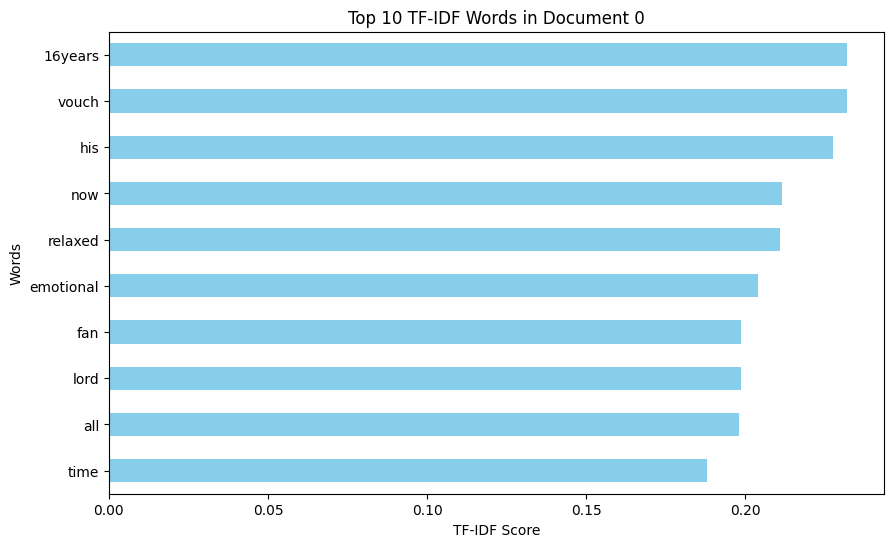

In [179]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the 'comment' column
tfidf_matrix = tfidf_vectorizer.fit_transform(X_TF_IDF['comment'])
feature_names = tfidf_vectorizer.get_feature_names_out()

# Convert the tf-idf matrix to a DataFrame for better readability
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Plot top 10 TF-IDF words for a specific document (for example, document 0)
document_idx = 0  # Change this to plot for other documents
top_n = 10  # Top 10 words
top_n_words = tfidf_df.iloc[document_idx].nlargest(top_n)

# Plot
plt.figure(figsize=(10, 6))
top_n_words.plot(kind='barh', color='skyblue')
plt.title(f"Top {top_n} TF-IDF Words in Document {document_idx}")
plt.xlabel("TF-IDF Score")
plt.ylabel("Words")
plt.gca().invert_yaxis()
plt.show()

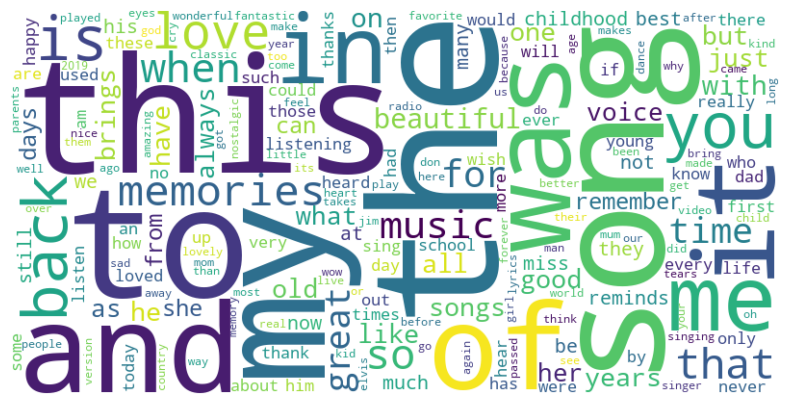

In [180]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate Word Cloud using the tf-idf scores from the entire corpus
tfidf_sum = tfidf_df.sum(axis=0)  # Sum the TF-IDF scores across all documents
word_freq = tfidf_sum.to_dict()   # Convert to a dictionary of word-frequency pairs

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [181]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(tfidf_df, X_TF_IDF['sentiment'], test_size=0.2, random_state=42)

# Initialize and train the GaussianNB classifier
#gnb = GaussianNB()
gnb = MultinomialNB()
gnb.fit(X_train, y_train)

# Make predictions
y_pred = gnb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 84.67%

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.75      0.82       142
           1       0.81      0.93      0.86       158

    accuracy                           0.85       300
   macro avg       0.86      0.84      0.84       300
weighted avg       0.85      0.85      0.85       300



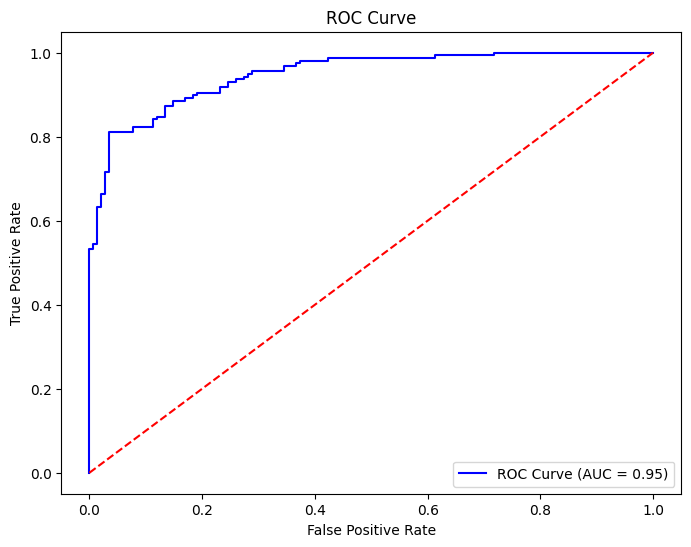

In [182]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Predict the probabilities for the positive class
y_prob = gnb.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})", color='blue')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [183]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

X_Orig = pd.read_csv("hf://datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")
X_Orig.drop_duplicates(keep='first', inplace=True)
X_Orig['sentiment'] = X_Orig['sentiment'].apply(lambda x: 1 if x == "nostalgia" else 0)

count_vect = CountVectorizer()  # Initialize the CountVectorizer
X_counts = count_vect.fit_transform(X_Orig['comment'])  # Transform the text data into word counts

# Get the unique words (vocabulary) from the vectorizer
words = count_vect.get_feature_names_out()

# Create a DataFrame where rows are documents and columns are words
term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)

term_document_df

,00,000,045,07,10,100,10m,11,11th,12,...,yours,yourself,youth,youthful,youtube,yrs,yuo,yup,zealand,zulus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [184]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(term_document_df, X_Orig['sentiment'], test_size=0.2, random_state=42)

# Initialize and train the GaussianNB classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = nb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 85.33%

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.76      0.83       142
           1       0.81      0.94      0.87       158

    accuracy                           0.85       300
   macro avg       0.86      0.85      0.85       300
weighted avg       0.86      0.85      0.85       300



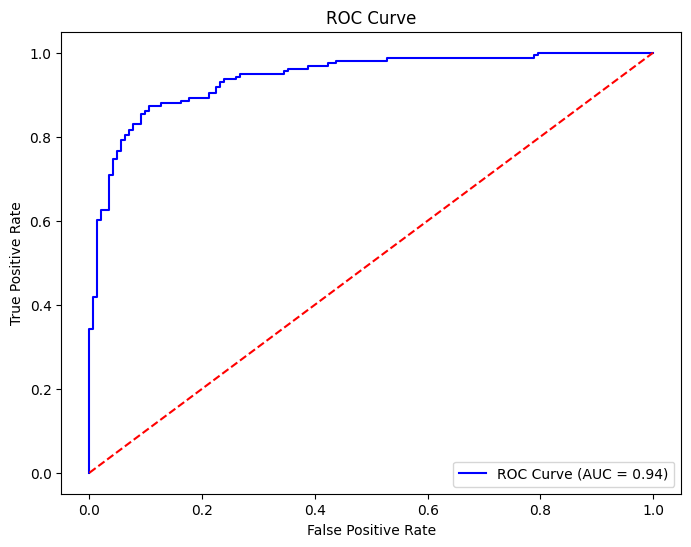

In [185]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Predict the probabilities for the positive class
y_prob = nb_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})", color='blue')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()